In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
plt.style.use('ggplot')

In [4]:
#Read in dataset and check first five rows
reviews = pd.read_csv('winemag-data_first150k.csv')
reviews.head(5)

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,variety,winery
0,0,US,This tremendous 100% varietal wine hails from ...,Martha's Vineyard,96,235.0,California,Napa Valley,Napa,Cabernet Sauvignon,Heitz
1,1,Spain,"Ripe aromas of fig, blackberry and cassis are ...",Carodorum Selección Especial Reserva,96,110.0,Northern Spain,Toro,NaN,Tinta de Toro,Bodega Carmen Rodríguez
2,2,US,Mac Watson honors the memory of a wine once ma...,Special Selected Late Harvest,96,90.0,California,Knights Valley,Sonoma,Sauvignon Blanc,Macauley
3,3,US,"This spent 20 months in 30% new French oak, an...",Reserve,96,65.0,Oregon,Willamette Valley,Willamette Valley,Pinot Noir,Ponzi
4,4,France,"This is the top wine from La Bégude, named aft...",La Brûlade,95,66.0,Provence,Bandol,NaN,Provence red blend,Domaine de la Bégude


In [47]:
reviews.info() #Get some overall info on the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150930 entries, 0 to 150929
Data columns (total 11 columns):
Unnamed: 0     150930 non-null int64
country        150925 non-null object
description    150930 non-null object
designation    105195 non-null object
points         150930 non-null int64
price          137235 non-null float64
province       150925 non-null object
region_1       125870 non-null object
region_2       60953 non-null object
variety        150930 non-null object
winery         150930 non-null object
dtypes: float64(1), int64(2), object(8)
memory usage: 12.7+ MB


# Plotting Categorical Data
## 1) Bar Charts
Say we want to see where most of the wine reviewed is coming from. In the following command, you'll see a chain of different functions. Let's break them down:
1. First, we're selecting the 'province' section of our data set
2. Applying the "value_counts" function counts up all the instances of a certain categorical label
3. head(10) gives us the top (most common) 10 results from that value count
4. Pandas datasets have built-plotting functionality. The plot function indicates we want to make a plot, and the bar() function that we want a barplot

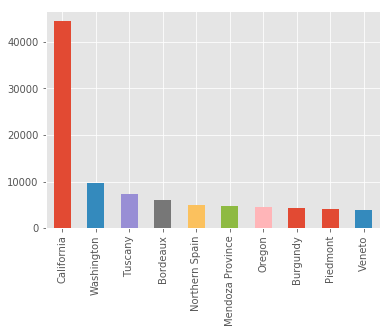

In [48]:
reviews['province'].value_counts().head(10).plot.bar()

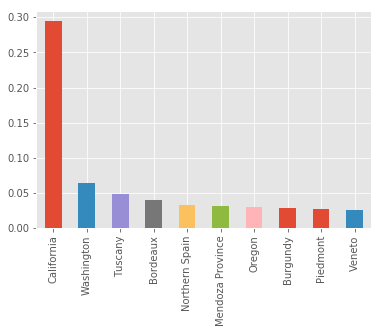

In [49]:
#Let's normalize that result so everything falls into a percentage range:
(reviews['province'].value_counts().head(10) / len(reviews)).plot.bar()

Categories like countries or zip codes or names are examples of something called <b> nominal categories</b>. It's a "pure" category, where there is no obvious ordering. There are also <b> ordinal categories </b>, something like a number. In the wine reviews dataset, we can get value counts of the total score given to a wine and sort them using the "sort_index" function.

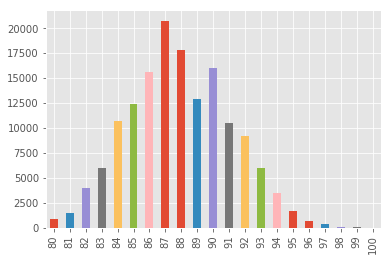

In [50]:
reviews['points'].value_counts().sort_index().plot.bar()

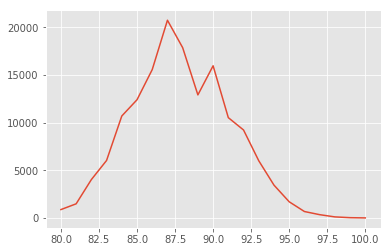

In [51]:
#We can visualize the same data as a line chart:
reviews['points'].value_counts().sort_index().plot.line()

Notice how a line chart obscures some of the details of our data. Additionally, it doesn't make sense to use a line chart for nominal categories - so when possible, bar charts tend to be more explanatory!

## Histograms
Most wines are relatively cheap. Some wines, however, are inordinately expensive. We can make our histogram more selective if we want:

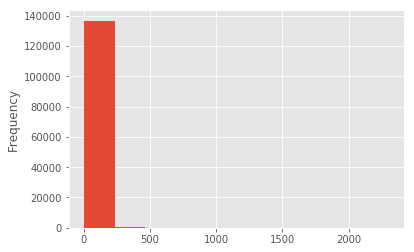

In [52]:
reviews['price'].plot.hist()

In [6]:
reviews[reviews['price'] > 1500]

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,variety,winery
13318,13318,US,The nose on this single-vineyard wine from a s...,Roger Rose Vineyard,91,2013.0,California,Arroyo Seco,Central Coast,Chardonnay,Blair
34920,34920,France,"A big, powerful wine that sums up the richness...",NaN,99,2300.0,Bordeaux,Pauillac,NaN,Bordeaux-style Red Blend,Château Latour
34922,34922,France,"A massive wine for Margaux, packed with tannin...",NaN,98,1900.0,Bordeaux,Margaux,NaN,Bordeaux-style Red Blend,Château Margaux


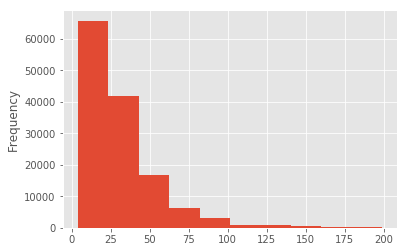

In [7]:
reviews[reviews['price'] < 200]['price'].plot.hist()

## Styling your plots:
Under the hood, pandas is relying on matplotlib to do data visualization (that's why changing the plt style changed all our pandas plots), so we can use matplot norms like the figsize(x,y) command to change the size of our plot. We can supply different colors, and give titles, and more.

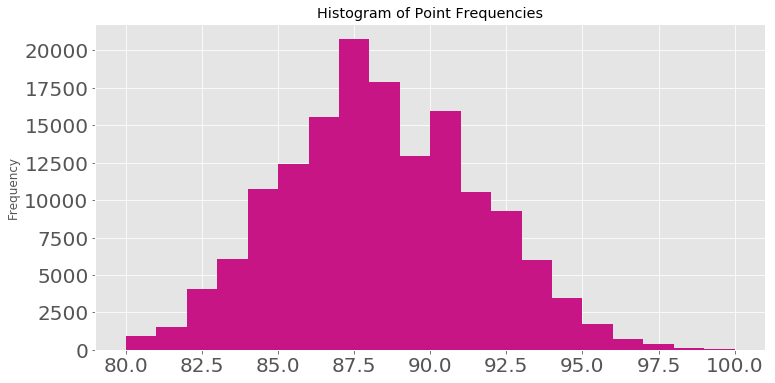

In [10]:
reviews['points'].plot.hist(bins=20, color='mediumvioletred', 
                            figsize=(12,6), fontsize=20, 
                            title="Histogram of Point Frequencies")

However, manipulating matplotlib through pandas means we have less control over every detail of our plot. Say we want to make the title larger? To do this, we'll use matplotlib directly.

Text(0.5, 1.0, 'Rankings Given by Wine Magazine')

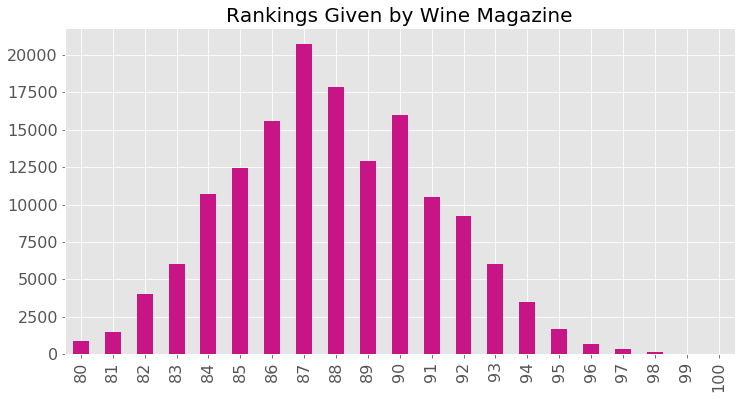

In [86]:
ax = reviews['points'].value_counts().sort_index().plot.bar(
    figsize=(12, 6),
    color='mediumvioletred',
    fontsize=16
)
ax.set_title("Rankings Given by Wine Magazine", fontsize=20)


# Bivariate Plotting
So far, all the plots we've seen have only used a single variable. What if we wanted to compare two features?

## Scatter Plots:
Scatter plots allow us to compare two numerical datasets. However, scatterplots don't work well with overlapping data. If there are two wines, each with 95 points, but a different cost, the second one is overplotted onto the first, adding another point to our plot. If we're comparing 150k different wines, our plot could become pretty ugly (you'll see). Consequently, scatter plots are most effective when working with relatively small datasets.

Text(0.5, 1.0, 'Price of Wine by Points')

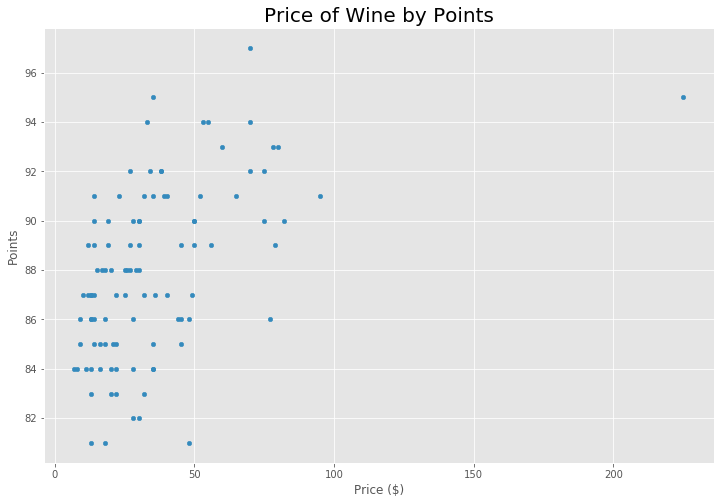

In [12]:
ax = reviews[reviews['price'] < 250].sample(100).plot.scatter(x='price', 
                                                              y='points', 
                                                        figsize = (12,8))
ax.set_xlabel("Price ($)")
ax.set_ylabel("Points")
ax.set_title("Price of Wine by Points", fontsize=20)

Text(0.5, 1.0, 'Price of Wine by Points (oversampled)')

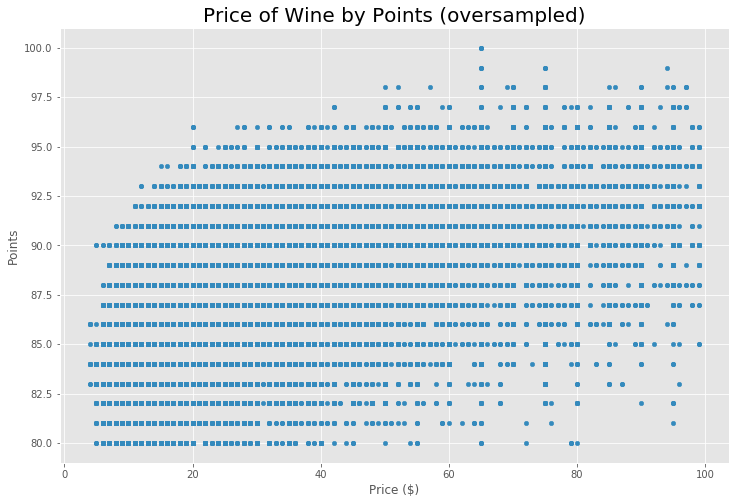

In [105]:
ax = reviews[reviews['price'] < 100].plot.scatter(x='price', y='points', figsize = (12,8))
ax.set_xlabel("Price ($)")
ax.set_ylabel("Points")
ax.set_title("Price of Wine by Points (oversampled)", fontsize=20)